<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Артем! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert alert-info">
Привет, Дмитрий! Спасибо за содержательные комментарии, ниже оставил несколько своих вопросов,исправлений.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Привет, Артем! Давай посмотрим.</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

План работы:
1. Изучить общую информацию из датафрейма.
2. Выполнить ресемплирование ряда по одному часу.
3. Определить оптимальное значение размера окна для скользящего среднего.
4. Определить значение макимального лага.
5. Исследовать ряд на стационарность.
6. Провести масштабирование признаков.
7. Построить несколько моделей и найти для них значение метрики RMSE на обучающей выборке.
8. Проверить качество лучшей моделей на тестовой выборке.

## Подготовка

In [5]:
# pip install nb_black

In [6]:
#%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor

import lightgbm as lgb

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

Загрузим данные.

In [8]:
df = pd.read_csv("/datasets/taxi.csv", sep=",", parse_dates=[0], index_col=[0])
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, при загрузке сразу обрабатываются даты</div>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<IPython.core.display.Javascript object>

In [10]:
df.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

<IPython.core.display.Javascript object>

Отсортируем данные о датах ряда.

In [11]:
df.sort_index(axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
df.index.is_monotonic

True

<IPython.core.display.Javascript object>

Как видим, сортировка прошла успешно.

Выполним ресемплирование ряда по одному часу.

In [13]:
df = df.resample("1H").sum()

<IPython.core.display.Javascript object>

In [14]:
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


<IPython.core.display.Javascript object>

## Анализ

Определим оптимальное значение размера окна для скользящего среднего.

In [15]:
for i in [3, 6, 12, 24, 48]:
    result = (
        mean_squared_error(
            df.rolling(i).mean()["num_orders"][(i - 1) : len(df)],
            df["num_orders"][(i - 1) : len(df)],
        )
        ** 0.5
    )
    print("Размер окна:", i, "RMSE=", result)

Размер окна: 3 RMSE= 25.493240799993085
Размер окна: 6 RMSE= 34.08478104741695
Размер окна: 12 RMSE= 36.23864069807729
Размер окна: 24 RMSE= 36.83557376701805
Размер окна: 48 RMSE= 37.271838825822826


<IPython.core.display.Javascript object>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Код синтаксически верный, что ты считаешь понятно, но с выводами абсолютно несогласен. По сути ты показываешь, что чем больший период окна мы берём, тем более гладким получается график со скользящим средним и тем большее количество шумов он сглаживает. Все ОК.  Но если выбирать по этой логике окно,то возьми 2 или 1, там вообще RMSE будет 0. 
</div>

<div class="alert alert-info">
С твоим комментарием полностью согласен, можешь, пожалуйста, подсказать, как тогда определить оптимальный размер окна, в заданиях из тренажера этот момент был пропущен.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Тут два способа. Либо перебор с оценкой по моделям, но он очень трудоемкий и не очень оптимальный. Второй вариант - интуиция и анализ. У нас есть два периода сезонности - сутки и неделя. Оптимально опираться на них (например выбрать из значений 24, 48, 72 ... 168). </div>

Как видим, наименьшее значение метрики RMSE наблюдалось при размере окна, равного 3, поэтому будем считать данный размер актуальным.

Определим значение макимального лага.

In [16]:
decomposed = seasonal_decompose(df)

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть декомпозиция на тренд и сезонность</div>

<AxesSubplot:xlabel='datetime'>

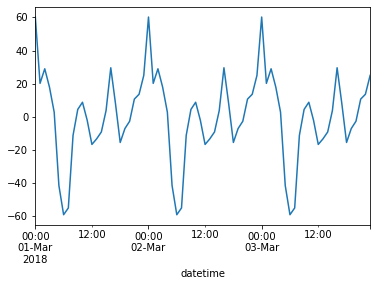

<IPython.core.display.Javascript object>

In [17]:
decomposed.seasonal["2018-03-01":"2018-03-03"].plot()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Суточная сезонность</div>

In [18]:
decomposed.seasonal["2018-03-03"].idxmax()

Timestamp('2018-03-03 00:00:00', freq='H')

<IPython.core.display.Javascript object>

In [19]:
decomposed.seasonal["2018-03-03"].idxmin()

Timestamp('2018-03-03 06:00:00', freq='H')

<IPython.core.display.Javascript object>

Видим, что сезонная компонента временного ряда достигает пика в полночь, а минимума в 6 утра, поэтому максимальный лаг возьмем равным 6.

<AxesSubplot:xlabel='datetime'>

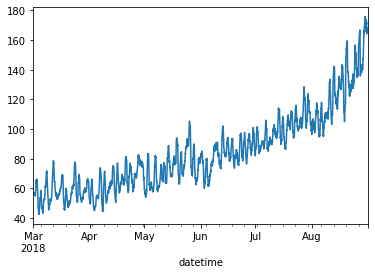

<IPython.core.display.Javascript object>

In [20]:
decomposed.trend.plot()

<div class="alert alert-info">
Из полученного графика видим, что количество заказов с начало марта по конец августа постоянно растет.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v3</b> 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Похоже ты забыл исследовать тренд</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
    
Давай обратимся к определению тренда.  Тренд - это долгосрочное изменение уровня ряда. Исследовать за сутки/двое трое нет смысла. Нужно смотреть график за весь период. И делать выводы о том, как меняется общее количество поездок за всё время.    
    
Поэтому нужно вывести график тренда за всё время и написать выводы.  </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

<div class="alert alert-info">
Определим недельную сезонность. Для этого сделаем ресемплинг данных по суткам.
</div>

In [257]:
df_D = pd.read_csv("/datasets/taxi.csv", sep=",", parse_dates=[0], index_col=[0])

<IPython.core.display.Javascript object>

In [258]:
df_D = df.resample("1D").sum()

<IPython.core.display.Javascript object>

In [259]:
df_D

,num_orders
datetime,
2018-03-01,1364
2018-03-02,1506
2018-03-03,1290
2018-03-04,1141
2018-03-05,1259
...,...
2018-08-27,3936
2018-08-28,3357
2018-08-29,3762


<IPython.core.display.Javascript object>

In [260]:
decomposed_D = seasonal_decompose(df_D)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='datetime'>

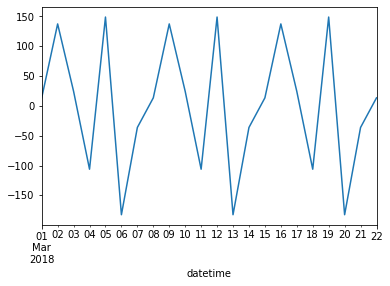

<IPython.core.display.Javascript object>

In [261]:
decomposed_D.seasonal["2018-03-01":"2018-03-22"].plot()

Из полученного графика следует, что в данных присутствует недельная сезонность. В течение недели наблюдается два пика во второй и пятый день недели, и существует два спада - в 4 день и более сильный в 6 день.

Построим скользящее среднее и скользящее стандартное отклонение для данного ряда с найденным оптимальным значением размера окна.

<AxesSubplot:xlabel='datetime'>

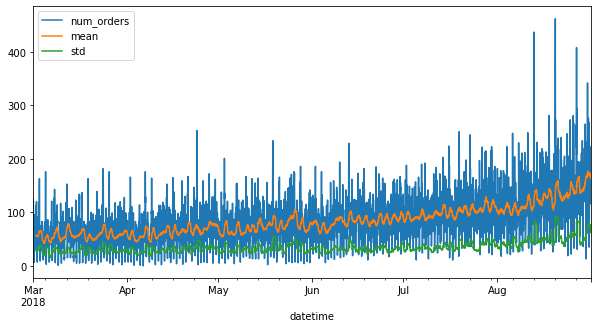

<IPython.core.display.Javascript object>

In [262]:
df["mean"] = df["num_orders"].rolling(24).mean()
df["std"] = df["num_orders"].rolling(24).std()
df.plot(figsize=(10, 5))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Как видно из график, скользящие среднее  и стандартное отклонение за 3 часа не сильно помогает понять график. Советую посмотреть с усреднением за сутки, из скользящих значений сразу уйдут колебания, связаные с суточной сезонностью.
</div>

<div class="alert alert-info">
Действительно, так лучше.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

Из полученного графика следует, что среднее и дисперсия исследуемого ряда практически не меняются, значит, он стационарен. Проверим данное утверждение с помощью теста Дики-Фуллера.


```
H_0: Временной ряд имеет единичный корень, что означает, что он нестационарен.`
H_1: Временной ряд не имеет единичного корня, что означает, что он является стационарным.`
alpha = 0.05
```

In [263]:
result = adfuller(df["num_orders"], regression="ctt")

<IPython.core.display.Javascript object>

In [264]:
print("p-value:", result[1])

p-value: 4.054939782324336e-17


<IPython.core.display.Javascript object>

In [265]:
alpha = 0.05
result[1] > alpha

False

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Так как значение p-value < 0.05, то можно отвергнуть нулевую гипотезу, значит, ряд стационарен.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста опиши, что удалось узнать о нашем датасете: тренды, сезонность, какие еще интересные закономерности ты нашел (да хотя-бы за какой период наши данные).</div>

В результате проведенного анализа удалось выяснить, что исследуемый ряд обладает суточной и недельной сезонностью, восходящим трендом и является стационарным.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
    
Осталось написать характеристики тренда.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v3</b> 👍 </div>

## Обучение

In [266]:
df.head()

,num_orders,mean,std
datetime,,,
2018-03-01 00:00:00,124,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN


<IPython.core.display.Javascript object>

Добавим к таблице четыре новых календарных признака: год, месяц, день и день недели, добавим новый столбец `max_lag`, который задаст максимальный размер отставания, и добавим скользящее среднее как признак `rolling_mean`.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы проводили анализ не просто так, это инструмент понять, какие признаки нам важны, а какими можно пренебречь.

</div>

In [267]:
def make_features(data, max_lag, rolling_mean_size):
    data["year"] = data.index.year
    data["month"] = data.index.month
    data["dayofweek"] = data.index.dayofweek
    data["hour"] = data.index.hour

    for lag in range(1, max_lag + 1):
        data["lag_{}".format(lag)] = data["num_orders"].shift(lag)

    data["rolling_mean"] = data["num_orders"].shift().rolling(rolling_mean_size).mean()

    return data

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь час, у нас четкая сезонность внутри суток.
Также очень полезный признак день недели, из нашего опыта это понятно, хоть мы и не делали отдельное исследование.
        
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Предлагаю удалить признак "день", т.к. сезонность внутри месяца мы не обнаружили.

</div>

<div class="alert alert-info">
Согласен.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарные признаки "месяц" и "год" лучше удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<div class="alert alert-info">
Далее удаляю данные по году и месяцу.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>    
Вижу что ты удалил их ниже, но проще не создавать )))
</div>

In [268]:
df = make_features(df, 6, 24)
df.head()

,num_orders,mean,std,year,month,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,NaN,NaN,2018,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN,2018,3,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN,2018,3,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN,2018,3,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN,2018,3,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Совет: Гиперпараметры max_lag, rolling_mean_size очень важны. Не обязательно подбирать их автоматически, но рекомендую посмотреть разные значения. С их ростом заметно улучшаются качество моделей. И в этом есть логика. Например, среднее по скользящему окну - это составляющая чистого тренда. Но если брать её за 3 часа, в  ней будет сильная "шумная" компонента, связанная с суточной сезонностью. Однако,  если взять размер окна равный суткам, то мы уберем влияние суточной сезонности. А если взять размер окна равный неделе - то и влияние недельной сезонности.

Рекомендую попрообовать гиперпараметры  max_lag, rolling_mean_size равными 24 часам или 168 часам.  Можешь попробовать промежуточные значения, но кратные суткам.   
    
</div>

<div class="alert alert-info">
Действительно, при rolling_mean_size=24 гораздо улучшается качество модели, чем при значении 3.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Рекомендую увидеть в этом кейсе очень важный урок: анализ данных и подготовка признаков это не формальность. Мы анализируем данные чтобы понять, какие признаки нам могут понадобиться и создать их. А хорошие признаки + размер датасета значат не меньше (а иногда больше) навороченных МЛ моделей. Ты можешь взять среднее и лаги по 168 + два каледарных признака и простая логистическая регрессия покажет 35 на тестовой выборке. А с плохими признаками мы едва вытягиваем 45 перебрав кучу моделей и гиперпараметров.   
    
</div>

In [269]:
df.drop(
    ["mean", "std"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Все верно, в этих признаках была утечка. </div>

In [270]:
df.head()

,num_orders,year,month,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [271]:
df["month"].unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

<IPython.core.display.Javascript object>

In [272]:
df["dayofweek"].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

<IPython.core.display.Javascript object>

In [273]:
df["year"].unique()

array([2018], dtype=int64)

<IPython.core.display.Javascript object>

Так как в нашем датафрейме данные только за один год, то можем удалить столбец `year`.

In [274]:
df.drop(
    ["year"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

<div class="alert alert-info">
Так как в датафрейме данные только по 6 месяцам, то столбец `day` является неинформативным, его можно удалить.
</div>

In [275]:
df.drop(
    ["month"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [276]:
df.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


<IPython.core.display.Javascript object>

Разделим исходные данные на две выборки: обучающая(90%) и тестовая(10%).

In [277]:
RANDOM_STATE = 12345

<IPython.core.display.Javascript object>

In [278]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()
features_train = train.drop("num_orders", axis=1)
target_train = train["num_orders"]
features_test = test.drop("num_orders", axis=1)
target_test = test["num_orders"]

<IPython.core.display.Javascript object>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Тебе не нужен RANDOM_STATE при разделении на выборки, мы не перемешиваем данные.
</div>

<div class="alert alert-info">
Согласен.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Корректное разбиение, данные не перемешиваются. </div>

In [279]:
features_train.shape

(3950, 9)

<IPython.core.display.Javascript object>

In [280]:
features_train.head()

,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,
2018-03-02 00:00:00,4,0,58.0,113.0,66.0,61.0,45.0,73.0,56.833333
2018-03-02 01:00:00,4,1,90.0,58.0,113.0,66.0,61.0,45.0,55.416667
2018-03-02 02:00:00,4,2,120.0,90.0,58.0,113.0,66.0,61.0,56.875000
2018-03-02 03:00:00,4,3,75.0,120.0,90.0,58.0,113.0,66.0,57.041667
2018-03-02 04:00:00,4,4,64.0,75.0,120.0,90.0,58.0,113.0,56.958333


<IPython.core.display.Javascript object>

In [281]:
features_test.shape

(442, 9)

<IPython.core.display.Javascript object>

In [282]:
features_test.head()

,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,
2018-08-13 14:00:00,0,14,119.0,92.0,144.0,156.0,137.0,91.0,138.541667
2018-08-13 15:00:00,0,15,102.0,119.0,92.0,144.0,156.0,137.0,138.458333
2018-08-13 16:00:00,0,16,175.0,102.0,119.0,92.0,144.0,156.0,139.541667
2018-08-13 17:00:00,0,17,144.0,175.0,102.0,119.0,92.0,144.0,139.166667
2018-08-13 18:00:00,0,18,152.0,144.0,175.0,102.0,119.0,92.0,140.708333


<IPython.core.display.Javascript object>

Видим по количеству строк в каждой выборке, что разделение проведено правильно.

Произведем масштабирование признаков для линейных моделей.

In [283]:
features_train_linear = features_train.copy()
features_test_linear = features_test.copy()

<IPython.core.display.Javascript object>

In [284]:
numeric = features_train.columns.tolist()
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train_linear[numeric] = scaler.transform(features_train[numeric])
features_test_linear[numeric] = scaler.transform(features_test[numeric])

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 обучение на обучающей, все верно</div>

In [285]:
features_train_linear

,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,
2018-03-02 00:00:00,0.485320,-1.659179,-0.527564,0.894187,-0.320444,-0.449344,-0.862885,-0.138173,-1.106319
2018-03-02 01:00:00,0.485320,-1.514680,0.299761,-0.527656,0.895012,-0.319978,-0.448830,-0.862776,-1.179778
2018-03-02 02:00:00,0.485320,-1.370181,1.075379,0.299598,-0.527331,0.896068,-0.319438,-0.448717,-1.104159
2018-03-02 03:00:00,0.485320,-1.225682,-0.088047,1.075149,0.300214,-0.526964,0.896848,-0.319324,-1.095517
2018-03-02 04:00:00,0.485320,-1.081183,-0.372440,-0.088177,1.076037,0.300982,-0.526465,0.896976,-1.099838
...,...,...,...,...,...,...,...,...,...
2018-08-13 09:00:00,-1.507418,-0.358687,0.325615,-1.018838,-0.320444,0.119869,1.673200,2.320305,2.897198
2018-08-13 10:00:00,-1.507418,-0.214188,1.514895,0.325450,-1.018685,-0.319978,0.120495,1.673337,2.959855
2018-08-13 11:00:00,-1.507418,-0.069689,2.006120,1.514628,0.326075,-1.018557,-0.319438,0.120614,3.063561


<IPython.core.display.Javascript object>

In [286]:
features_test_linear

,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,
2018-08-13 14:00:00,-1.507418,0.363809,1.049525,0.351302,1.696696,2.008621,1.517930,0.327644,3.130539
2018-08-13 15:00:00,-1.507418,0.508308,0.610008,1.049298,0.351936,1.698141,2.009620,1.518065,3.126218
2018-08-13 16:00:00,-1.507418,0.652807,2.497344,0.609819,1.050177,0.352729,1.699079,2.009760,3.182392
2018-08-13 17:00:00,-1.507418,0.797306,1.695873,2.496993,0.610543,1.051308,0.353401,1.699216,3.162947
2018-08-13 18:00:00,-1.507418,0.941805,1.902704,1.695590,2.498380,0.611462,1.052118,0.353523,3.242888
...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,0.485320,1.086304,3.324669,3.582764,3.067317,0.973688,1.414416,2.268547,4.496013
2018-08-31 20:00:00,0.485320,1.230803,1.489041,3.324247,3.584533,3.069427,0.974483,1.414550,4.634289
2018-08-31 21:00:00,0.485320,1.375302,1.954412,1.488776,3.325925,3.586893,3.070635,0.974612,4.660215


<IPython.core.display.Javascript object>

Видим, что масштабирование прошло успешно.

Построим несколько моделей для прогнозирования значений целевого признака `num_orders`.

Рассмотрим модель линейной регрессии.

In [287]:
%%time
model = LinearRegression()
time_split = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(
    model, features_train_linear, target_train, scoring='neg_root_mean_squared_error', cv=time_split, n_jobs=-1
)
print("RMSE модели линейной регрессии на обучающей выборке:", (scores * (-1)).min())

RMSE модели линейной регрессии на обучающей выборке: 27.028723071085004
Wall time: 35 ms


<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
🔥 Молодец, правильно используешь кросс-валидацию с TimeSeriesSplit </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Корень из среднего по MSE не равно среднему по RMSE. Пожалуйста используй neg_root_mean_squared_error.
    
https://scikit-learn.org/stable/modules/model_evaluation.html    
</div>

<div class="alert alert-info">
Исправил.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

Рассмотрим теперь дерево решений.

In [288]:
%%time
model = DecisionTreeRegressor(random_state=RANDOM_STATE)
time_split = TimeSeriesSplit(n_splits=5)
parameters = {"max_depth": range(1, 10, 1)}
grid_tr = GridSearchCV(model, parameters, cv=time_split, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_tr.fit(features_train, target_train)
grid_tr.best_params_

Wall time: 165 ms


{'max_depth': 7}

<IPython.core.display.Javascript object>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Корень из среднего по MSE не равно среднему по RMSE. Пожалуйста используй neg_root_mean_squared_error.
    
https://scikit-learn.org/stable/modules/model_evaluation.html    
    
я не буду его дублировать, но это важно и для всех остальных экспериметов    
</div>

In [289]:
print(
    "RMSE модели дерева решений на обучающей выборке:", ((grid_tr.best_score_ * (-1))),
)

RMSE модели дерева решений на обучающей выборке: 29.43710228621335


<IPython.core.display.Javascript object>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
А зачем делать предикт по обучающей выборке?
    
    grid_tr.predict(features_train)
    
Это явно лишнее, best_score_ уже подсчитан на этапе обучения модели (там есть аргумент refit=True)    
</div>

<div class="alert alert-info">
Понял, спасибо за теоретическую справку.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Используем GridSearchCV правильно</b>

При создании объекта GridSearchCV важно определить следующие составляющие:
  
  - estimator - модель, для которой будем подбирать гиперпарметры
  - param_grid  - (пространство параметров)
  - cv - схема кросс-валидации
  - scoring скорер (функция для оценки, оптимизируемая метрика)  
    
    

    from sklearn.model_selection import GridSearchCV
    gsearch = GridSearchCV(estimator=model, 
                           cv=5, 
				           param_grid=param_search,  
			               scoring=scorer)
    
    
Важно определить все составляющие, т.к. если мы что-то упустим, то они будут заменены на значения по умолчанию:
  
  - cv = 5 (стандартная кросс-валидация по 5 фолдам)
  - scoring = 'accuracy' для задачи классификации и 'r2' для регрессии. 
     
    
Часто можно использовать стандартный скорер из библиотеки sklearn (<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">ссылка</a>), или создать собственный с помощью функции <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html">make_scorer</a>   
    
Как узнать, какие гиперпараметры можно подбирать? 
    
    model.get_params().keys()
    
  
    
    
    
Следующим шагом мы обучаем полученный объект на обучающей выборке:
    

    gsearch.fit(X, y)	

Теперь, когда объект GridSearchCV обучен, нужно посмотреть, какую информацию мы можем извлечь из него.
    
Лучшая модель хранится в атрибуте best_estimator_
    
    gsearch.best_estimator_
    
Оценка лучшей модели, полученная с помощью кросс-валидации хранится в атрибуте best_score_
    
    gsearch.best_score_
    
Параметры лучшей модели хранятся в атрубите best_params_
    
    gsearch.best_params_
    

    
Таким образом, один раз обучив объект GridSearchCV мы сразу получаем и лучшую модель и лучшие гиперпараметры и оценку модели полученную с помощью кросс-валидации. И нет  необходимости в дополнительном обучении модели и определении метрик по выделенной валидационной выборке.      
    
    
<a href="https://scikit-learn.org/stable/modules/grid_search.html">Документация</a>    




</div>

Построим теперь модель случайного леса.

In [290]:
%%time
model = RandomForestRegressor(random_state=RANDOM_STATE)
time_split = TimeSeriesSplit(n_splits=5)
parameters = {"n_estimators": range(100, 201, 20)}
grid_rf = GridSearchCV(model, parameters, cv=time_split, scoring='neg_root_mean_squared_error')
grid_rf.fit(features_train, target_train)
grid_rf.best_params_

Wall time: 38.6 s


{'n_estimators': 200}

<IPython.core.display.Javascript object>

In [291]:
print(
    "RMSE модели случайного леса на обучающей выборке:", ((grid_rf.best_score_ * (-1))),
)

RMSE модели случайного леса на обучающей выборке: 25.397987890436923


<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Далее построим модели градиентного бустинга с помощью библиотек CatBoost и LightGBM.

In [292]:
%%time
model = CatBoostRegressor(loss_function="RMSE")
time_split = TimeSeriesSplit(n_splits=5)
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }
grid_CBR = GridSearchCV(model, param_grid = parameters, cv = time_split, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_CBR.fit(features_train, target_train, verbose = 10)
grid_CBR.best_params_

0:	learn: 37.0304264	total: 3.54ms	remaining: 350ms
10:	learn: 27.7443644	total: 29.5ms	remaining: 239ms
20:	learn: 24.8447795	total: 67.7ms	remaining: 255ms
30:	learn: 23.9212894	total: 107ms	remaining: 237ms
40:	learn: 23.1507379	total: 146ms	remaining: 210ms
50:	learn: 22.5921020	total: 192ms	remaining: 184ms
60:	learn: 22.1820787	total: 234ms	remaining: 149ms
70:	learn: 21.7678065	total: 287ms	remaining: 117ms
80:	learn: 21.4324324	total: 375ms	remaining: 87.9ms
90:	learn: 21.0500868	total: 457ms	remaining: 45.2ms
99:	learn: 20.7462983	total: 524ms	remaining: 0us
Wall time: 49.9 s


{'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

<IPython.core.display.Javascript object>

In [293]:
print(
    "RMSE модели CatBoostRegressor на обучающей выборке:",
    ((grid_CBR.best_score_ * (-1))),
)

RMSE модели CatBoostRegressor на обучающей выборке: 26.008414886167706


<IPython.core.display.Javascript object>

In [294]:
%%time
model = lgb.LGBMRegressor(verbosity= -1)
time_split = TimeSeriesSplit(n_splits=5)
parameters = {'max_depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'n_estimators'    : [30, 50, 100]
              }
grid_lgb = GridSearchCV(model, param_grid = parameters, cv = time_split, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_lgb.fit(features_train, target_train)
grid_lgb.best_params_

Wall time: 7.29 s


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

<IPython.core.display.Javascript object>

In [295]:
print(
    "RMSE модели LGBMRegressor на обучающей выборке:", ((grid_lgb.best_score_ * (-1))),
)

RMSE модели LGBMRegressor на обучающей выборке: 25.316898922138197


<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Все модели исследованы </div>

## Тестирование

Из полученных значений метрики RMSE для различных моделей следует, что лучший результат показала модель градиентного бустинга LGBMRegressor. Проверим ее качество на тестовой выборке. 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Можно не обучать модель. Лучшая модель,обученная на всех доступных данных уже содержится в grid.best_estimator_

</div>

In [296]:
pred = grid_lgb.best_estimator_.predict(features_test)
mean_squared_error(pred, target_test) ** 0.5

43.82121782983522

<IPython.core.display.Javascript object>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Требуемое качество модели получено </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

Видим, что модель LGBMRegressor показывает гораздо лучшее значение метрики RMSE на обучающей выборке, чем на тестовой. Желаемая точность модели на тестовой выборке достигается (RMSE=43.82 < 48).

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне, ты исследовал данные,  корректно подготовил признаки и обучил модели. Также в проекте много графиков и пояснений. 

Мне очень  понравилось, что правильно использовал кросс-валидацию для временых рядов.
    
Но есть ряд моментов, которые нужно доработать:
    
   - нужно исследовать тренд
   - в завершение раздела анализа нужно написать выводы
   - нужно удалить признак месяц (год ты удалил сам)

Желтые комментарии на твое усмотрение.
    
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Привет. Вижу что твоя работа стала заметно лучше, ты хорошо поработал. Но пару моментов нужно доделать: нужно исследовать тренд на всем промежутке данных и отразить это в выводах.    
    
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v3</b>

На этот  раз все супер! Прокт принят. Поздравляю и желаю дальнейших успехов!</div>